# Tarea 2: Aprendizaje no Supervisado

In [179]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.metrics import silhouette_score

Usted acaba de conseguir trabajo en una viña muy prestigiosa en Chile. Se le ha encargado como primera tarea, recategorizar los vinos que alli se producen. Su reputacion y permanencia en la empresa depende de los resultados de este trabajo.

En principio, usted no dispone de etiquetas y carece de conocimiento en enologia. Afortundamente, usted es experto en inteligencia artificial y decide abordar (convenientemente) este problema desde un punto de vista no supervisado.

Asumiendo que el sabor y sensacion del vino se reducen a interacciones y propiedades quimicas, usted solicita al equipo de enologos una base de datos con los indicadores mas importantes segun la literatura.

| Atributo | Descripción |
| --- | --- | 
|Alcohol| Grados de alcohol | 
|Malic_Acid| Acido málico | 
|Ash| Materia inorganica que permanece despues de la vaporacion del vino| 
|Ash_Alcanity| Alcalinidad de la sustancia | 
|Magnesium| Magnesio |
|Total_Phenols| Fenoles totales | 
|Flavanoids| Flavonoide | 
|Nonflavanoid_Phenols| Fenoles no flavonoide|
|Proanthocyanins| Proantocianidina| 
|Color_Intensity| Intesidad del color| 
|Hue| color o matiz | 
|OD280| medida de pureza en el vino| 
|Proline|Prolina |

In [180]:
df = pd.read_csv('wine-clustering.csv')
df.sample(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562
155,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.9,0.60,1.48,725


**1.- Realize una descripcion de los atributos**

In [181]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**2. Entrena un algoritmo de clustering**: Ajuste un k-Means. Encuentre el mejor hiperparametro para el `numero de vecinos` basadonse en el [coeficiente de silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette_score#sklearn-metrics-silhouette-score)

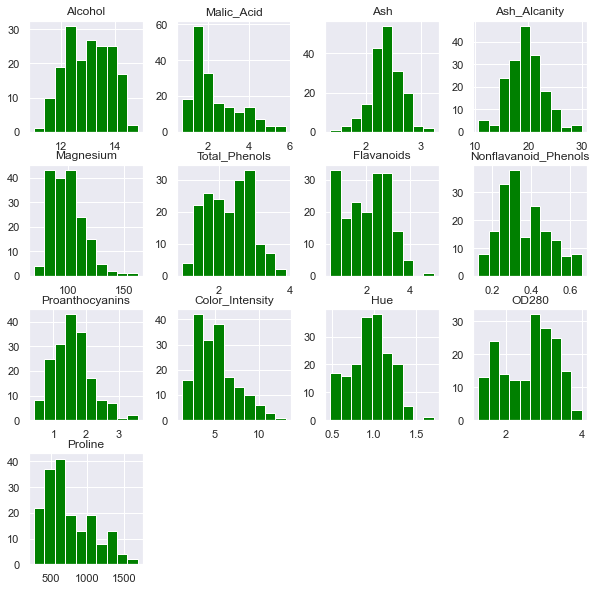

In [182]:
import seaborn as sns

sns.set()
df.hist(figsize=(10,10), color='green')
plt.show()

<AxesSubplot:title={'center':'Feature correlation'}>

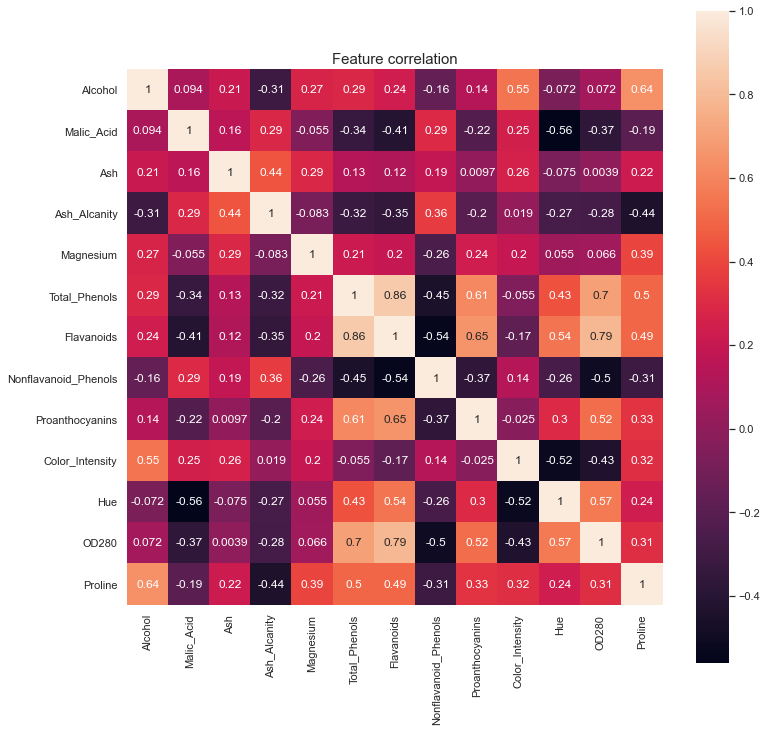

In [183]:
plt.figure(figsize=(12,12))
plt.title('Feature correlation', size=15)
sns.heatmap(df.astype(float).corr(),vmax=1.0, square=True, annot=True)

In [184]:
from sklearn.cluster import KMeans
from sklearn import metrics

def kmeans(n_clusters, X, printMetric = False):
    tmpDataframe = X.copy()
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(tmpDataframe)
    predictions = kmeans.predict(tmpDataframe)
    score = metrics.silhouette_score(tmpDataframe, kmeans.labels_)
    if printMetric:
        print("with {} clusters, Silhouette Coefficient is: {:.2f}".format(n_clusters, score))
    return score

In [185]:
def analizeKmeans(X):
    tmpDataframe = X.copy()
    bestScore = 0
    n_clusters = -1
    clusters = range(2,10)
    scores = []
    for i in clusters:
        score = kmeans(i, tmpDataframe)
        scores.append(score)
        if bestScore < score:
            bestScore = score
            n_clusters = i
    print("with {} clusters, we have the best Silhouette Coefficient: {:.2f}".format(n_clusters, bestScore))
    plt.plot(clusters, scores)


with 2 clusters, we have the best Silhouette Coefficient: 0.66


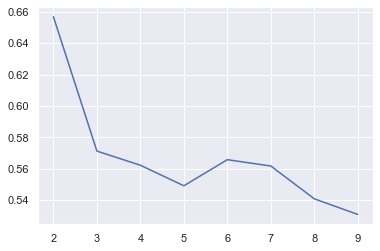

In [186]:
from sklearn import preprocessing
X = df.copy()
scaler = preprocessing.StandardScaler().fit(df.copy())
X_scaled = scaler.transform(df)

analizeKmeans(X)

with 3 clusters, we have the best Silhouette Coefficient: 0.28


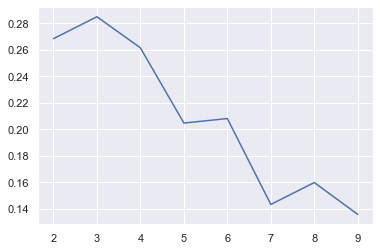

In [187]:
analizeKmeans(X_scaled)

In [217]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
y = kmeans.predict(X_scaled)
labels = list(map(str, np.unique(kmeans.labels_)))
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

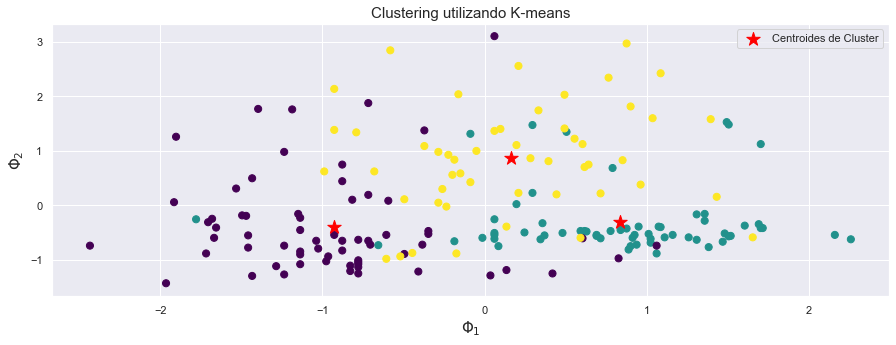

In [206]:
plt.figure(figsize=(15,5)) # Creamos una figura

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=200, label='Centroides de Cluster')

plt.title('Clustering utilizando K-means', fontsize=15)
plt.xlabel(r'$\Phi_1$', fontsize=15)
plt.ylabel(r'$\Phi_2$', fontsize=15)
plt.legend()
plt.show()

**3. Describa utilizando medidas de tendencia central cada cluster**

In [207]:

labelsDF = pd.DataFrame(y, columns=['Label'])
results = pd.concat([df, labelsDF], axis=1)
classZero = results.loc[results['Label'] == 0]
classOne = results.loc[results['Label'] == 1]
classTwo = results.loc[results['Label'] == 2]

In [191]:
classZero.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,0.0
std,0.559094,0.675642,0.245345,3.309462,13.153529,0.341240,0.479979,0.072883,0.438496,1.294196,0.119749,0.363773,232.721773,0.0
min,11.560000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,2.600000,0.820000,2.510000,465.000000,0.0
25%,13.292500,1.662500,2.292500,16.000000,98.500000,2.600000,2.680000,0.252500,1.660000,4.500000,0.987500,2.870000,973.750000,0.0
50%,13.735000,1.765000,2.445000,17.000000,105.500000,2.825000,2.975000,0.290000,1.895000,5.400000,1.070000,3.170000,1072.500000,0.0
75%,14.090000,1.942500,2.617500,18.875000,115.750000,3.000000,3.247500,0.320000,2.095000,6.200000,1.130000,3.447500,1277.500000,0.0
max,14.830000,4.040000,3.230000,30.000000,162.000000,3.880000,5.080000,0.500000,3.280000,8.900000,1.310000,4.000000,1680.000000,0.0


In [192]:
classOne.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,1.0
std,0.521855,1.093366,0.199023,2.408001,11.073693,0.349497,0.323911,0.123029,0.411335,2.345596,0.120383,0.274850,120.723554,0.0
min,12.200000,1.240000,1.980000,16.000000,80.000000,0.980000,0.340000,0.170000,0.550000,3.400000,0.480000,1.270000,372.000000,1.0
25%,12.780000,2.585000,2.290000,19.750000,89.000000,1.445000,0.580000,0.400000,0.835000,5.340000,0.590000,1.530000,520.000000,1.0
50%,13.110000,3.270000,2.380000,21.000000,97.000000,1.650000,0.700000,0.470000,1.100000,7.300000,0.670000,1.680000,620.000000,1.0
75%,13.495000,3.905000,2.590000,22.750000,106.000000,1.815000,1.025000,0.530000,1.350000,9.105000,0.765000,1.825000,690.000000,1.0
max,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.590000,0.630000,2.700000,13.000000,0.980000,2.470000,880.000000,1.0


In [193]:
classTwo.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,2.0
std,0.533010,1.012253,0.299199,3.019446,13.680822,0.530291,0.608949,0.121434,0.570397,0.791806,0.201926,0.457812,142.732439,0.0
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.670000,278.000000,2.0
25%,11.870000,1.210000,2.000000,18.000000,86.000000,1.900000,1.640000,0.270000,1.350000,2.500000,0.930000,2.460000,406.000000,2.0
50%,12.250000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.350000,1.560000,2.900000,1.040000,2.840000,495.000000,2.0
75%,12.420000,2.130000,2.420000,21.600000,98.000000,2.560000,2.450000,0.430000,1.870000,3.300000,1.220000,3.160000,625.000000,2.0
max,13.860000,5.800000,2.920000,28.500000,151.000000,3.520000,3.750000,0.660000,3.580000,5.300000,1.710000,3.640000,886.000000,2.0


In [208]:
print(df.var())
print()
print(classZero.var())
print()
print(classOne.var())
print()
print(classTwo.var())

Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64

Alcohol                     0.284099
Malic_Acid                  1.024657
Ash                         0.089520
Ash_Alcanity                9.117053
Magnesium                 187.164904
Total_Phenols               0.281209
Flavanoids                  0.370819
Nonflavanoid_Phenols        0.014746
Proanthocyanins             0.325353
Color_Intensity             0.626956
Hue                         0.040774
OD280                       0.209591
Proline                 20372.549038
Label                 

**4. Entrene un Random Forest utilizando las etiquetas encontradas**: El objetivo de probar este algoritmo es ver la importancia de las features segun cada cluster

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

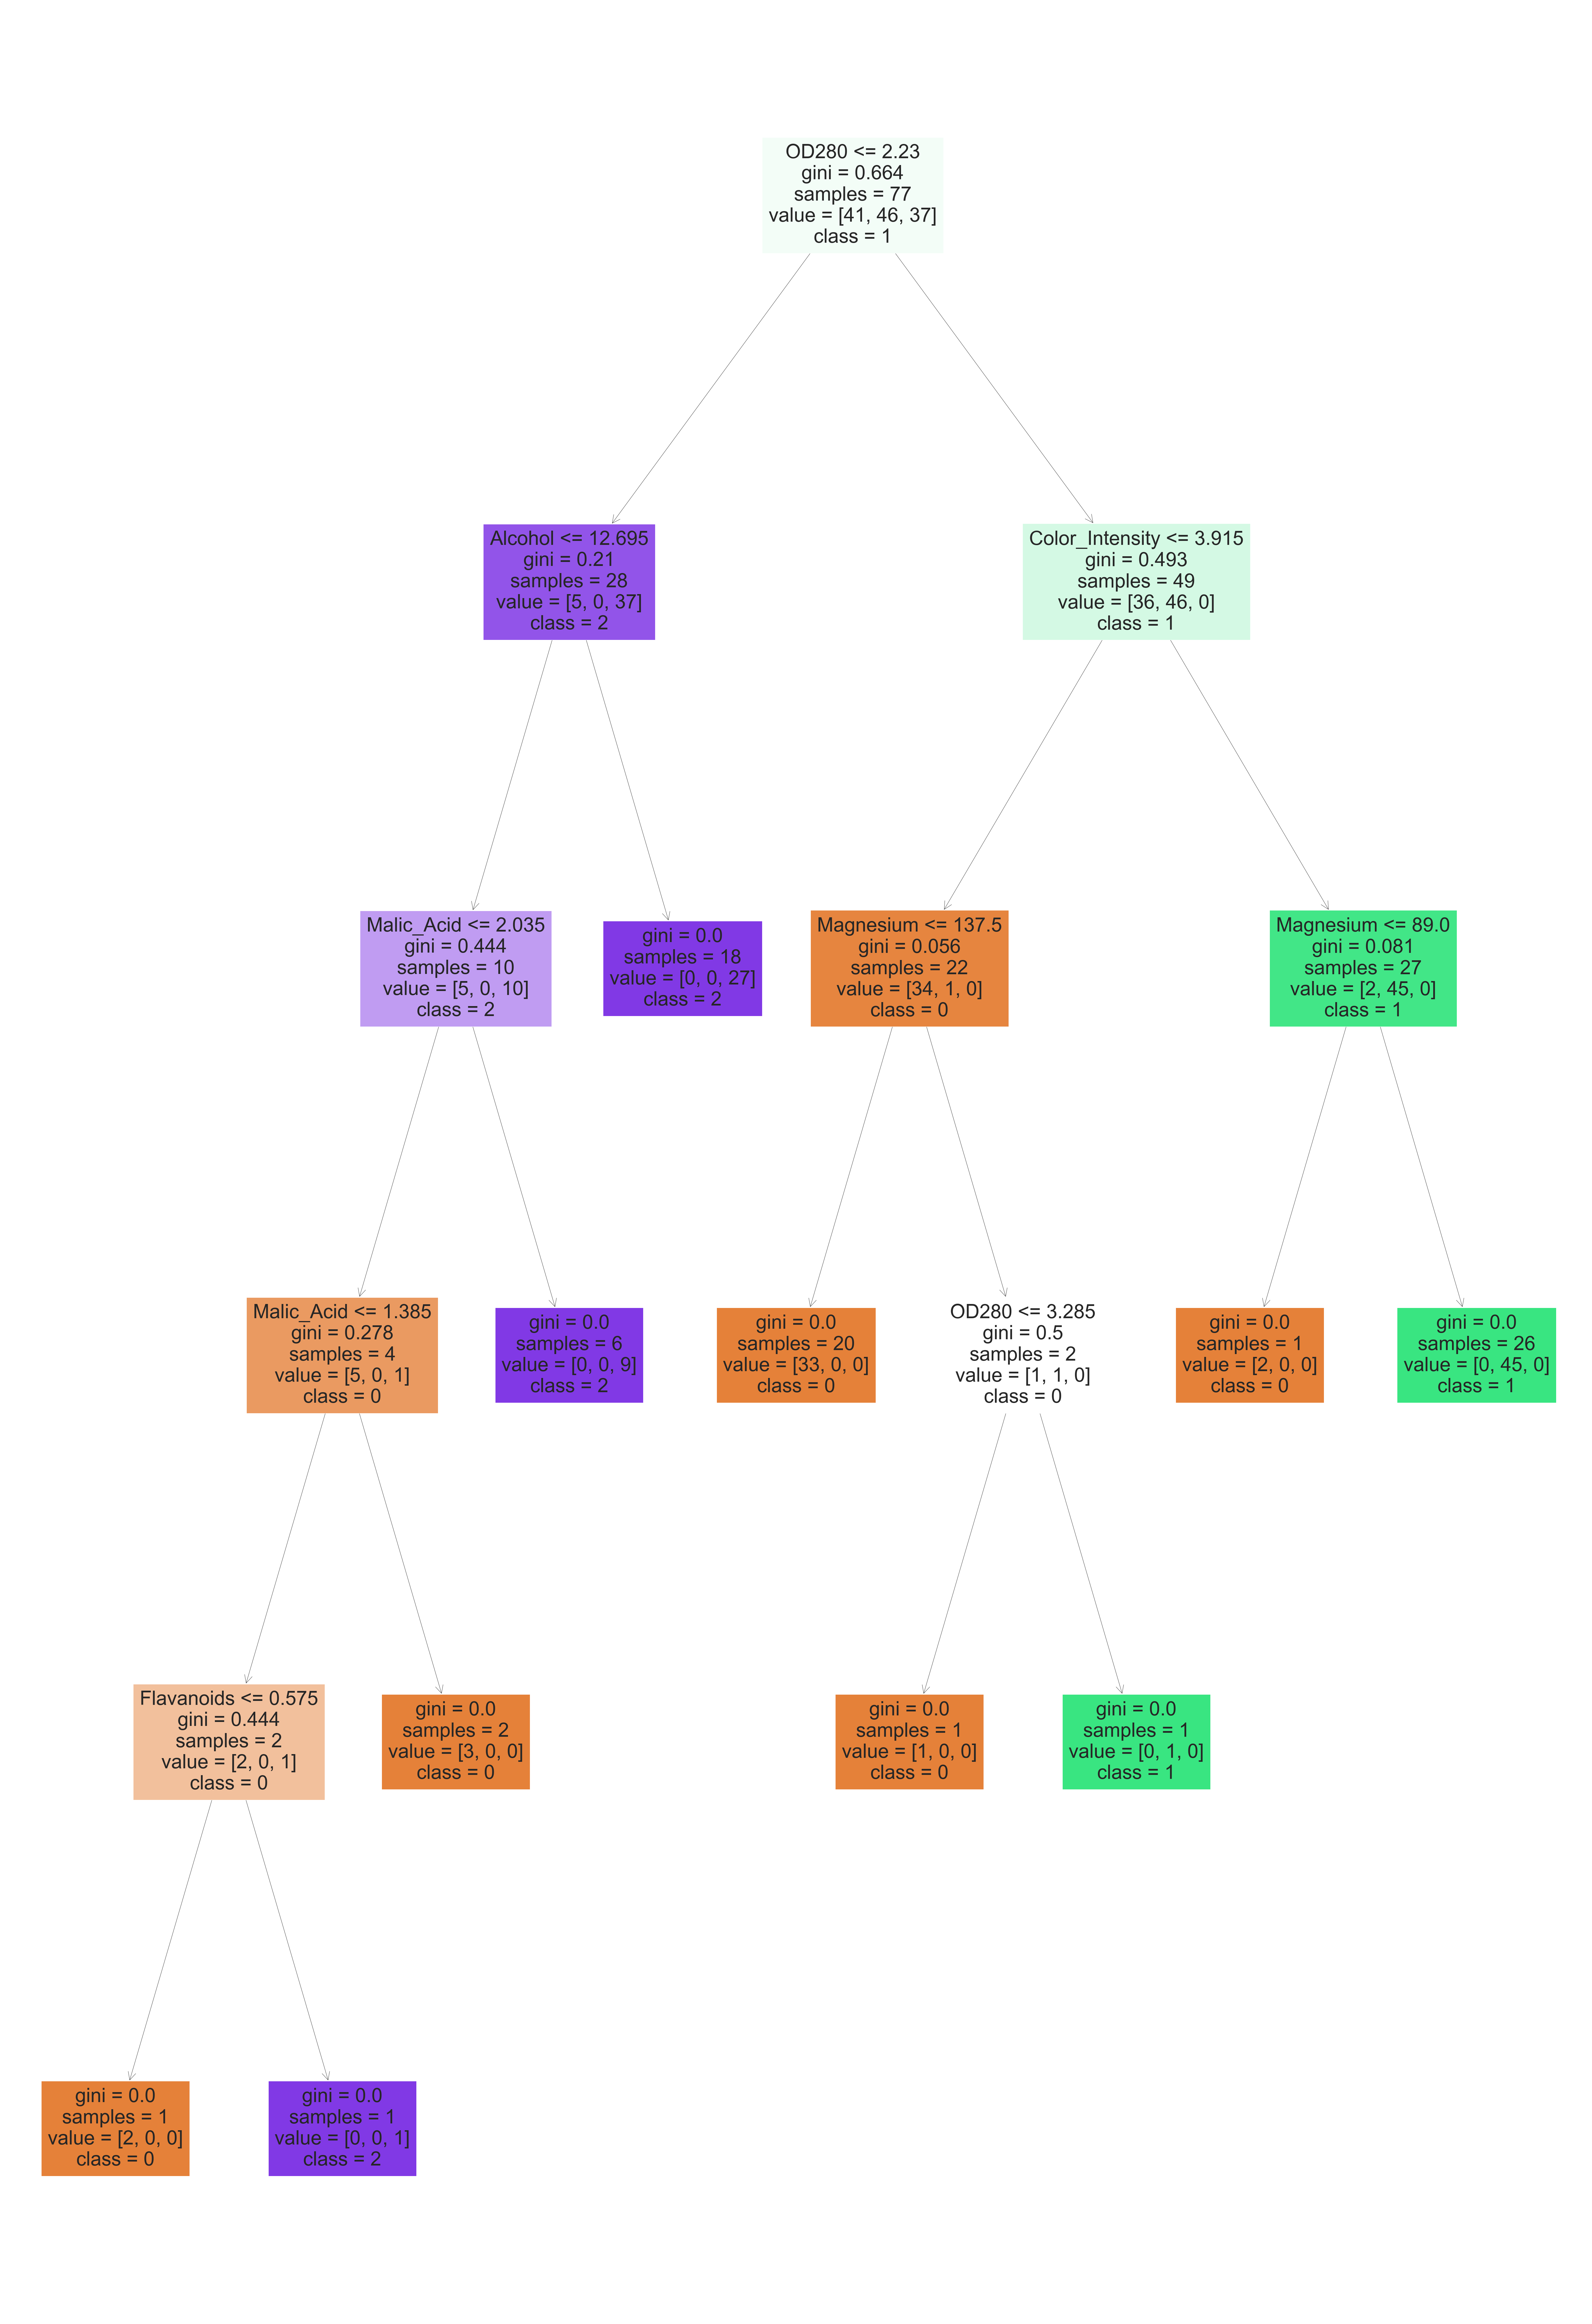

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

clasification = RandomForestClassifier(random_state=42)
model = clasification.fit(X_train, y_train)

fig = plt.figure(figsize=(100,150))
_ = tree.plot_tree(
    clasification.estimators_[0],
    feature_names = X.columns,
    class_names = labels,
    filled=True
)

In [211]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

y_train_pred = model.predict(X_train)
print('accuracy: {}'.format(accuracy_score(y_train, y_train_pred)))

prec, recall, f1, _ = precision_recall_fscore_support(y_train, y_train_pred, average='macro')
print('precision: {} recall: {} F1: {}'.format(prec, recall, f1))

accuracy: 1.0
precision: 1.0 recall: 1.0 F1: 1.0


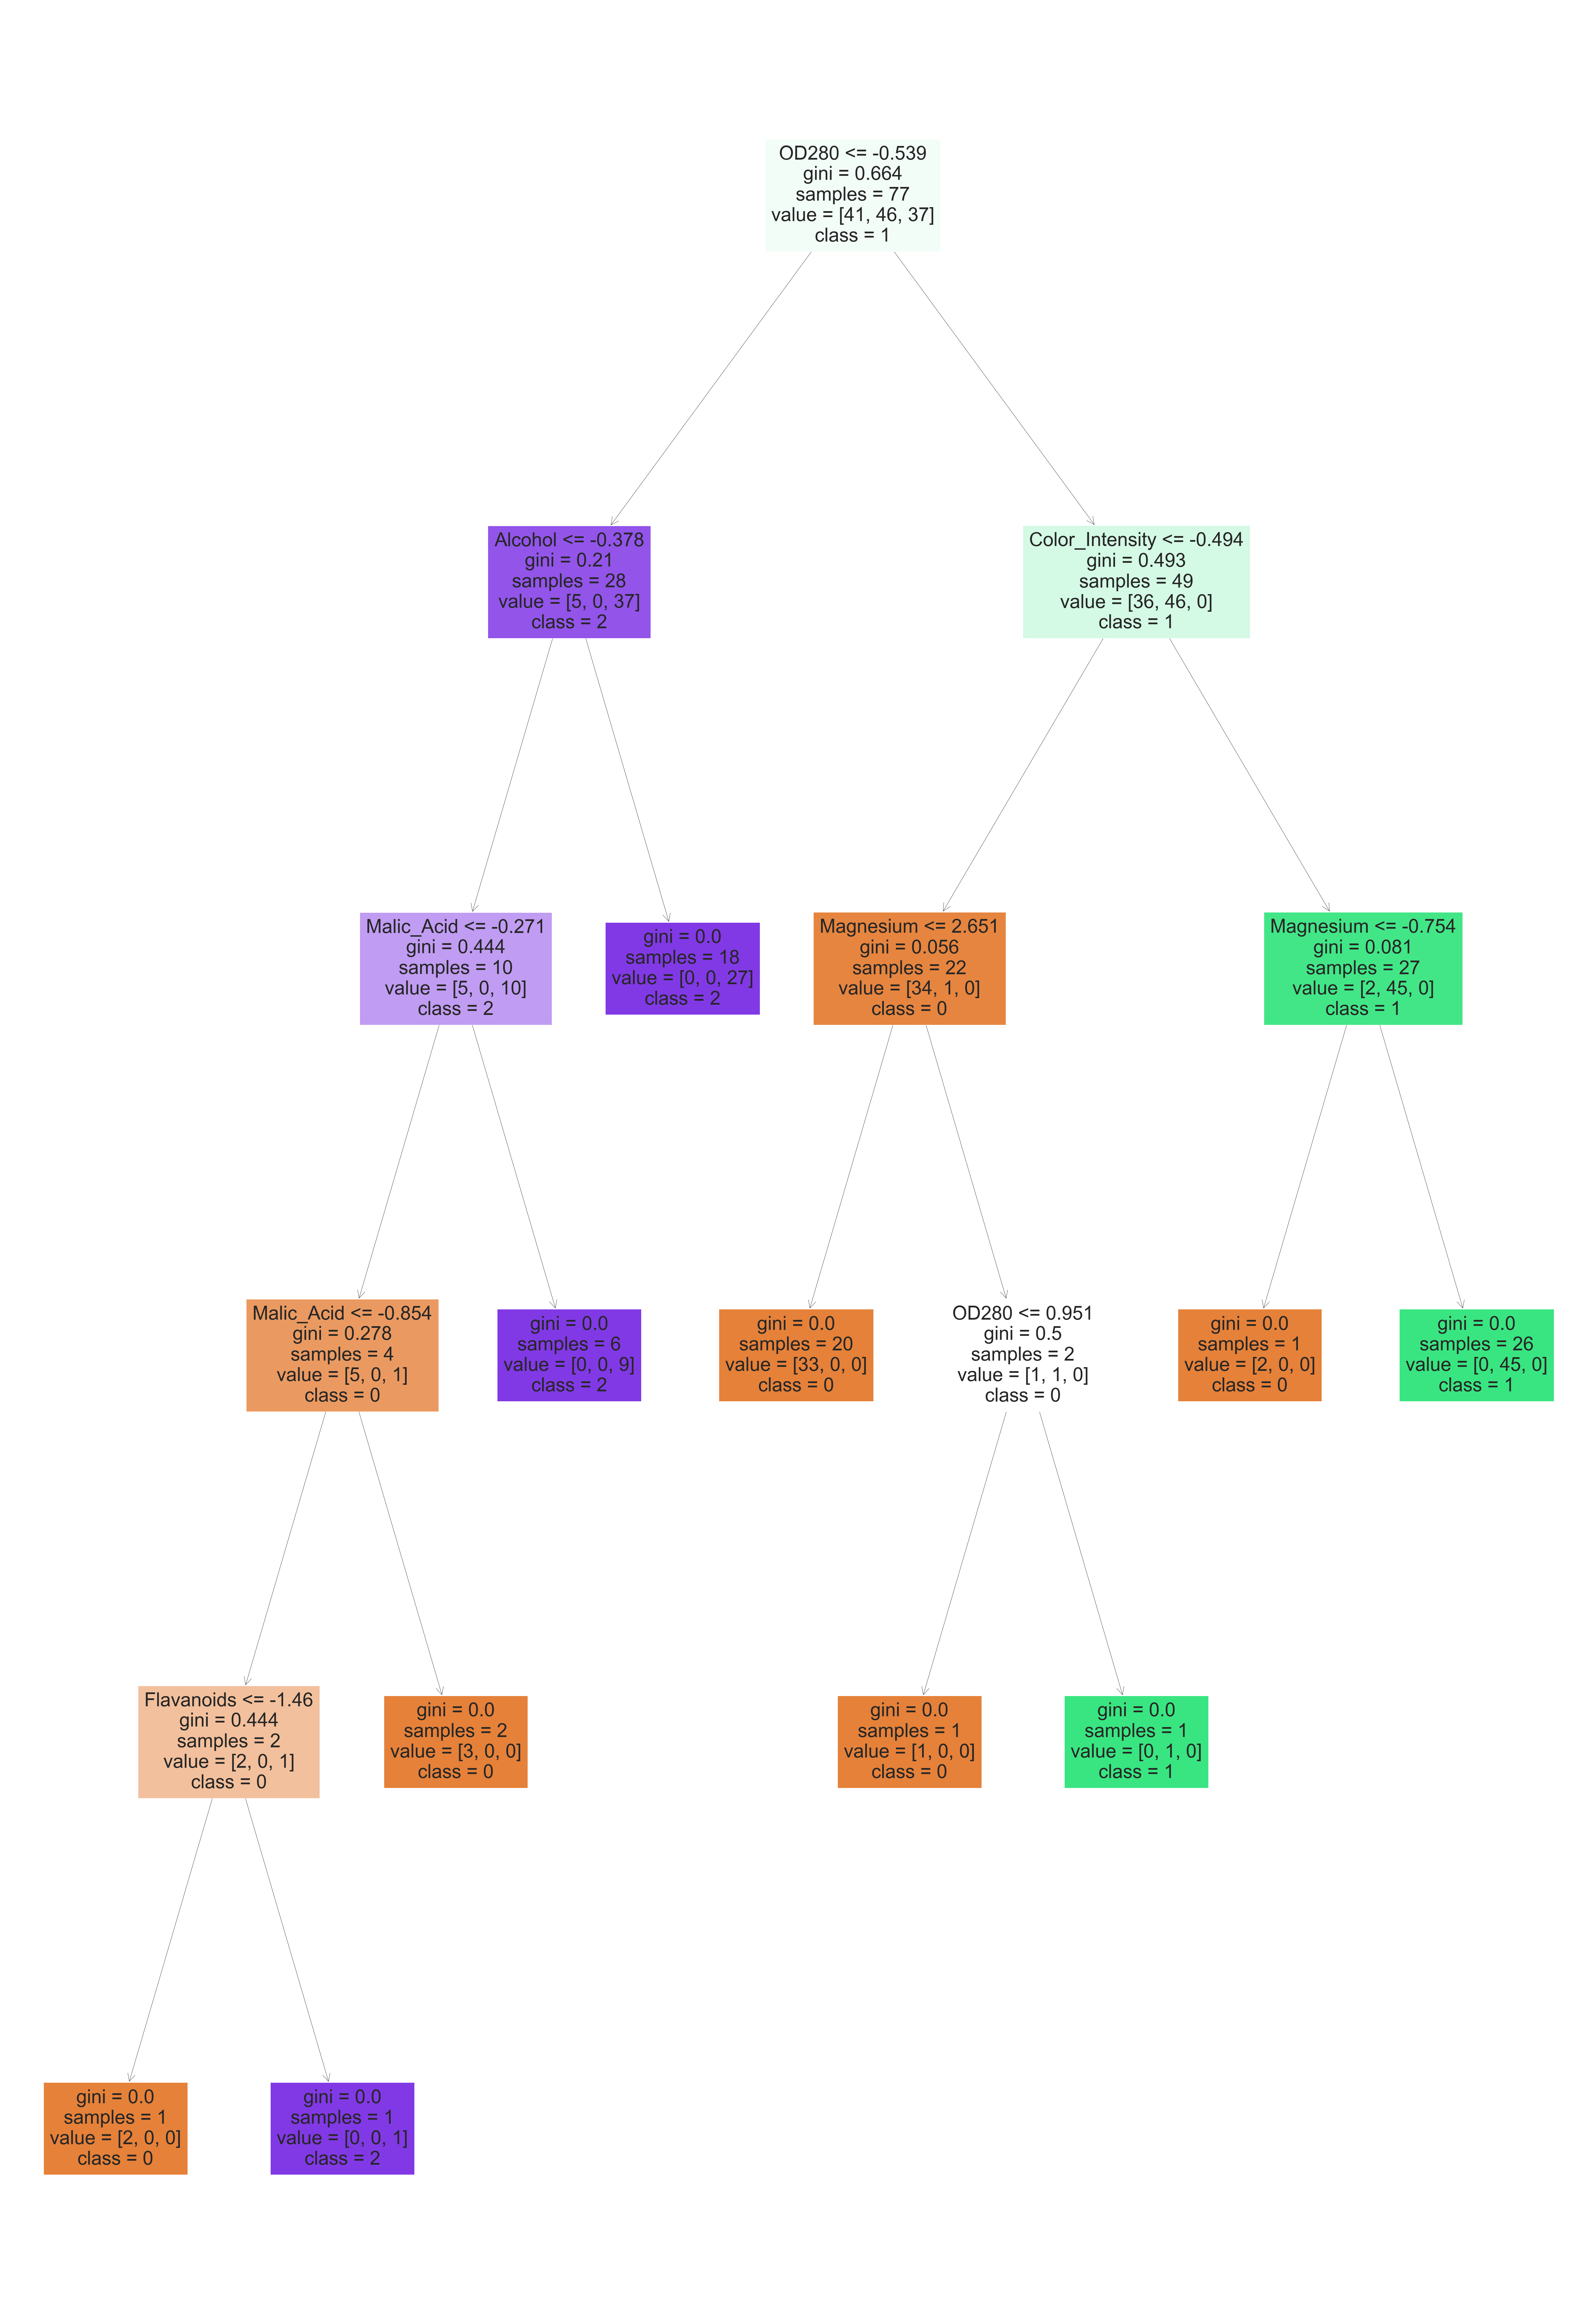

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
clasification = RandomForestClassifier(random_state=42)
model_with_scaled_data = clasification.fit(X_train, y_train)

fig = plt.figure(figsize=(100,150))
_ = tree.plot_tree(
    clasification.estimators_[0],
    feature_names = X.columns,
    class_names = labels,
    filled=True
)

**4.1 Grafique la importancia de las caracteristicas**

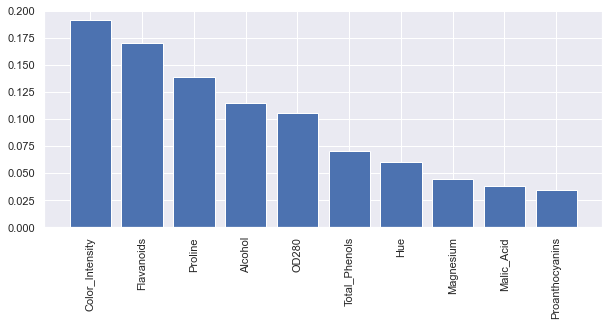

In [213]:
fig = plt.figure(figsize=(10,4))
x = range(len(model.feature_importances_))
indices = np.argsort(model.feature_importances_)
importance = model.feature_importances_[indices][::-1]
attr_name = X.columns[indices][::-1]

N=10
plt.bar(x[:N], importance[:N])
plt.xticks(x[:N],attr_name[:N], rotation=90)
plt.show()

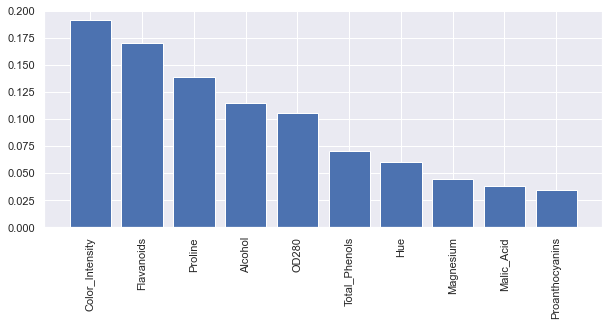

In [214]:
fig = plt.figure(figsize=(10,4))
x = range(len(model_with_scaled_data.feature_importances_))
indices = np.argsort(model.feature_importances_)
importance = model_with_scaled_data.feature_importances_[indices][::-1]
attr_name = X.columns[indices][::-1]

N=10
plt.bar(x[:N], importance[:N])
plt.xticks(x[:N],attr_name[:N], rotation=90)
plt.show()

**4.2 Justifique la categorizacion utilizando las importancias**

**5. Visualice los groupos encontrados en un grafico 2D**: Puede utilizar cualquier algoritmo de reduccion de dimensionalidad.

In [231]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
y_tsne = tsne.fit_transform(X_scaled)

<ipython-input-238-51223b600b16>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(155)


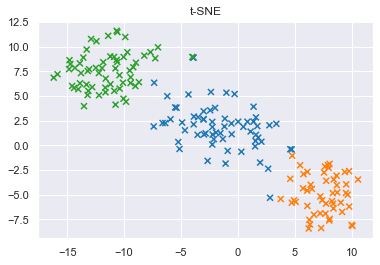

In [238]:
def defineColor(index):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    return colors[index]

c = list(map(defineColor, kmeans.labels_))

ax = fig.add_subplot(155)
plt.scatter(y_tsne[:,0], y_tsne[:,1], c=c, marker='x')
plt.title('t-SNE')
plt.show()